# Install Geopandas

### Conda Navigator

Die folgenden Pakete braucht es, um alle Geopandas-Features laufen zu lassen.
- `geopandas`
- `descartes`
- `pysal`

Man findet sie im Anaconda Navigator unter dem Tab «Environments». Im Dropdown «Not installed» oder «All» anwählen, dann im Suchfeld den Namen des Packages eingeben und installieren.

Testet die Installation an diesem Punkt auf jeden Fall!


Bei mit (auf dem Mac) musste ich zusätzlich eine Codezeile in einer Datei manuell ändern. Das geht so (evtl ist dieses Issue aber mit dem neuen Release gefixt):
- Navigate to your home folder (`~`, this is the one which contains your Desktop, Downloads etc. and is named after your computer user account)
- From here, navigate to: `~/opt/anaconda3/envs/CAS-Datenjournalismus/lib/python3.8/site-packages/` (or any other python environment you are using, if it is not named "CAS Datenjournalismus")
- This is the place where your packages are stored. In a text editor, open the file `shapely/geos.py`.
- Replace Line 113 (`free = load_dll('c').free`) in this file with the following line: `free = load_dll('c', fallbacks=["/usr/lib/libSystem.dylib"]).free`

### (old Version with Pip)

When we worked with Brew and Pip, there were even more packages that had to be installed:

* `brew install geos`
* `brew install gdal`
* `brew install spatialindex`
* `pip install pillow`
* `pip install pysal`
* `pip install geopandas`
* `pip install rtree`
* `pip install descartes`

# Test

Und falls das richtig geklappt hat, funktioniert das jetzt schnörkellos:

## Vorbereitung

In [2]:
import pandas as pd

In [3]:
import geopandas as gpd

## File Öffnen

In [16]:
path = 'dataprojects/Projections/shp/g2k17.shp'

In [17]:
gdf = gpd.read_file(path, encoding='utf-8')

In [18]:
gdf

,KTNR,KTNAME,GRNR,AREA_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,X_CNTR,Y_CNTR,...,Z_MAX,Z_AVG,Z_MED,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,geometry
0,1,Zürich,4,172894,669244,716900,223896,283343,691800,252000,...,1291,533,504,2669244,2716900,1223896,1283343,2691800,1252000,"POLYGON ((692429.202 281173.707, 692993.467 28..."
1,2,Bern / Berne,2,595952,556241,677745,130585,243834,614200,185600,...,4271,1198,979,2556241,2677745,1130585,1243834,2614200,1185600,"MULTIPOLYGON (((573502.204 194804.720, 573996...."
2,3,Luzern,6,149352,630127,681764,180569,237691,651000,213100,...,2348,770,680,2630127,2681764,1180569,1237691,2651000,1213100,"POLYGON ((662037.558 237690.723, 662271.728 23..."
3,4,Uri,6,107654,673344,715795,153452,205339,690800,180700,...,3628,1900,1975,2673344,2715795,1153452,1205339,2690800,1180700,"POLYGON ((688456.999 203340.000, 688740.000 20..."
4,5,Schwyz,6,90788,672166,718719,193657,231067,700100,213100,...,2800,1096,1053,2672166,2718719,1193657,1231067,2700100,1213100,"POLYGON ((704358.804 230191.723, 706142.258 22..."
5,6,Obwalden,6,49058,646044,681478,178345,203583,658700,189900,...,3238,1337,1368,2646044,2681478,1178345,1203583,2658700,1189900,"MULTIPOLYGON (((672130.200 190973.100, 671407...."
6,7,Nidwalden,6,27585,659303,686448,180483,208075,673600,197700,...,2898,1071,986,2659303,2686448,1180483,1208075,2673600,1197700,"POLYGON ((671798.251 206022.836, 672021.878 20..."
7,8,Glarus,5,68531,709273,738138,183891,225967,723700,204600,...,3608,1579,1594,2709273,2738138,1183891,1225967,2723700,1204600,"POLYGON ((723477.400 221272.410, 723896.499 22..."
8,9,Zug,6,23873,672418,695749,215061,233506,683300,223500,...,1579,664,638,2672418,2695749,1215061,1233506,2683300,1223500,"POLYGON ((674087.434 231889.051, 674454.750 23..."
9,10,Fribourg / Freiburg,2,167142,546837,595531,143053,206219,573800,173100,...,2388,855,750,2546837,2595531,1143053,1206219,2573800,1173100,"MULTIPOLYGON (((549452.332 175204.260, 548298...."


## Plot

<AxesSubplot:>

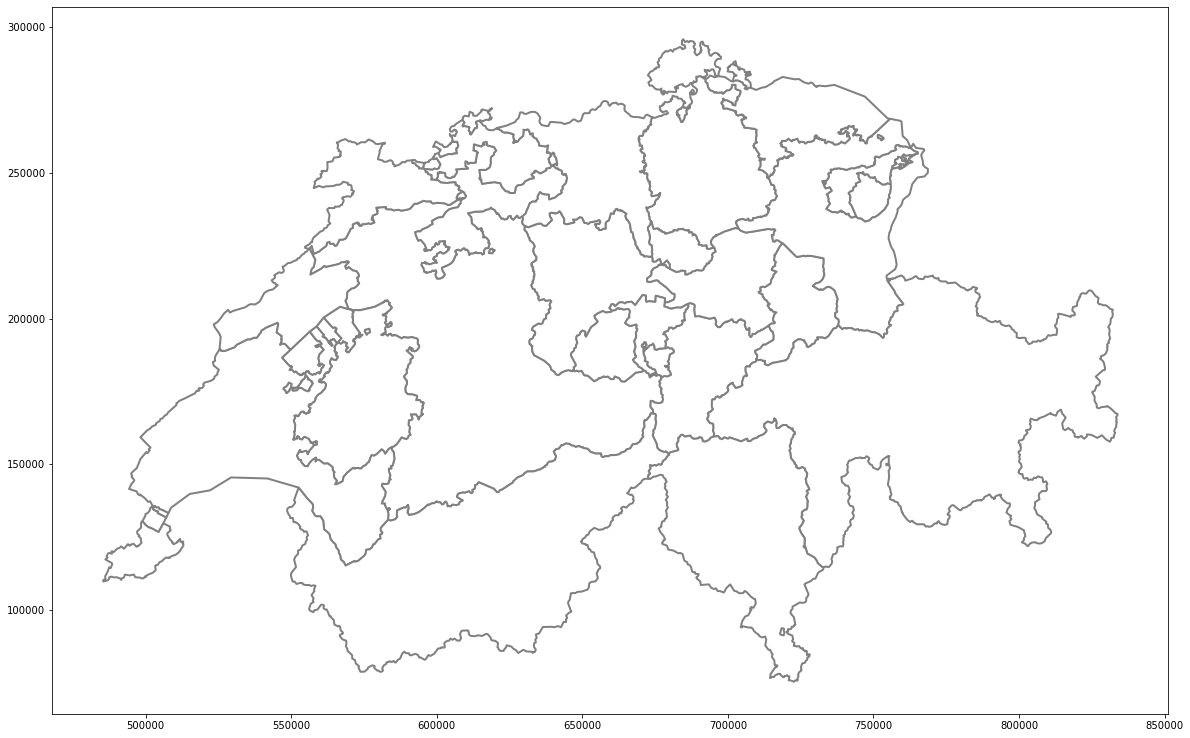

In [13]:
gdf.plot(edgecolor='grey', color='white', alpha=1, linewidth=2, figsize=(20,13))

<AxesSubplot:>

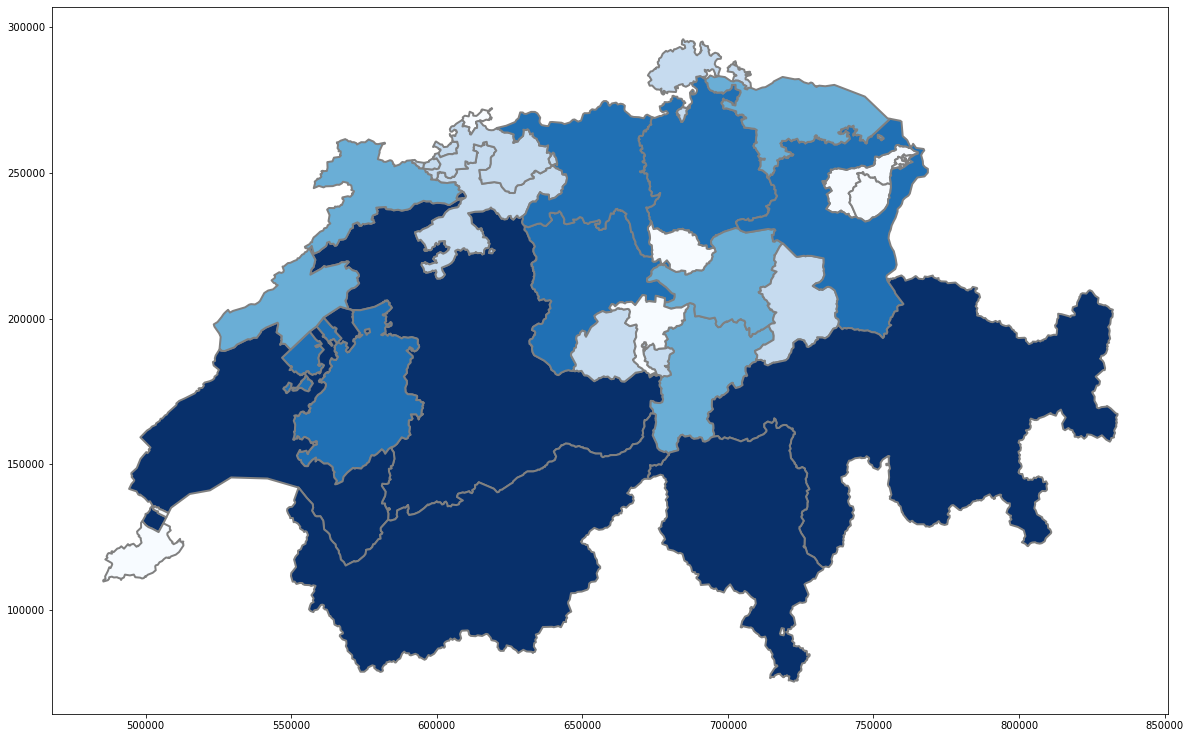

In [15]:
gdf.plot(
    edgecolor='grey',
    column='AREA_HA',
    cmap='Blues',
    scheme='quantiles',
    k=5,
    alpha=1,
    linewidth=2,
    figsize=(20,13)
)